In [1]:
import pathlib
import pylab as plt
from datetime import datetime
#from matplotlib import pyplot as plt
import numpy as np
from numpy import unique
from numpy import where
import pandas as pd
import matplotlib
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
sns.set_style('white')

In [3]:
PRJ='PRJNA747757'
BASE_PATH='/mnt/8TB_2/Data/Assembly/'
DATA_PATH=f'{BASE_PATH}{PRJ}/'
PLOT_PATH=DATA_PATH+'general_plots/'
PLOT_DATA_FILE='Pangolin_CoVs_updated.csv'
ITERATION=0
PARAMS=''
#PARAMS='default'

In [4]:
#df_accessions=pd.read_csv(PLOT_PATH+'accessions_kraken2.csv')

In [5]:
#df_accessions.head()

### CoVs

In [6]:
df_cov=pd.read_csv(PLOT_PATH+PLOT_DATA_FILE)

In [7]:
df_cov.head(n=2)

,Virus name,Abbreviation,Passage details/history,GISAID Accession ID,NCBI Accession,Sample Collection date,Sequencing Date,Sequence Submission Date,Length,Host,...,Originating lab,Submitting lab,Authors,Submitter,Reference,BioProject,SRA datasets,RNA-Seq dataset notes,Hosted on,Reference.1
0,hCoV-19/pangolin/Guangxi/P4L/2017,P4L,Original,EPI_ISL_410538,MT040333.1,2017,NaN,2020-02-17,"29,806",Manis javanica,...,Beijing Institute of Microbiology and Epidemio...,Beijing Institute of Microbiology and Epidemio...,Wu-Chun Cao; Tommy Tsan-Yuk Lam; Na Jia; Ya-We...,"Lam, Tsan Yuk",Lam et al. (2020),PRJNA606875,NaN,Filtered,GISAID,NaN
1,hCoV-19/pangolin/Guangxi/P1E/2017,P1E,Original,EPI_ISL_410539,MT040334.1,2017,NaN,2020-02-17,"29,801",Manis javanica,...,Beijing Institute of Microbiology and Epidemio...,Beijing Institute of Microbiology and Epidemio...,Wu-Chun Cao; Tommy Tsan-Yuk Lam; Na Jia; Ya-We...,"Lam, Tsan Yuk",Lam et al. (2020),PRJNA606875,NaN,Filtered,GISAID,NaN


In [8]:
df_cov['Submission_Date'] = pd.to_datetime(df_cov['Sequence Submission Date'], format='%Y-%m-%d', errors='coerce')
df_cov.dtypes

Virus name                                 object
Abbreviation                               object
Passage details/history                    object
GISAID Accession ID                        object
NCBI Accession                             object
Sample Collection date                     object
Sequencing Date                           float64
Sequence Submission Date                   object
Length                                     object
Host                                       object
Additional location information            object
Specimen source                            object
CoV homology                               object
Genome region                              object
Location                                   object
Originating lab                            object
Submitting lab                             object
Authors                                    object
Submitter                                  object
Reference                                  object


In [9]:
df_GD=df_cov[df_cov["CoV homology"].isin(["GD"])]
df_GX=df_cov[df_cov["CoV homology"].isin(["GX"])]
df_HKU4=df_cov[df_cov["CoV homology"].isin(["HKU4r-CoV"])]
#need for start of time series
df_Liu=df_cov[df_cov["CoV homology"].isin(["GD_PRJNA"])]
df_Chen=df_cov[df_cov["CoV homology"].isin(["HKU4r-CoV_PRJNA"])]
#df_ZC45=df_cov[df_cov["CoV homology"].isin(["GX_PRJNA"])]
df_EOF=df_cov[df_cov["CoV homology"].isin(["EOF"])]
df_GD=df_Liu.append(df_GD)
df_HKU4=df_Chen.append(df_HKU4)
df_GD= df_GD.append(df_EOF)

In [10]:
df_gd_count = df_GD['Submission_Date'].value_counts().reset_index(name='counts')

In [11]:
df_gd_count.columns=['Submission_Date','counts']

In [12]:
df_gd_count = df_gd_count.sort_values(by='Submission_Date') 
df_gd_count=df_gd_count.drop_duplicates('Submission_Date').set_index('Submission_Date').asfreq('D',fill_value=0)

In [13]:
df2=df_GD[df_GD.duplicated('Submission_Date')].set_index('Submission_Date')

new_df=df_GD.drop_duplicates('Submission_Date').set_index('Submission_Date').asfreq('D',fill_value=0)

#new_df=new_df.append(df2).sort_index().reset_index()
new_df['v_place']=[0]*len(new_df)
new_df['v_bin'] = np.where(new_df['Sequence Submission Date'] != 0,1, 0)

In [14]:
new_df['Sequence Submission Date'] = pd.to_datetime(new_df['Sequence Submission Date'], format='%Y-%m-%d', errors='coerce')

In [15]:
df_gd_count['Sequence Submission Date'] = df_gd_count.index

In [16]:
df_m_gd=pd.merge(new_df, df_gd_count, on='Sequence Submission Date')

In [17]:
df_m_gd=df_m_gd.drop_duplicates('Sequence Submission Date').set_index('Sequence Submission Date').asfreq('D',fill_value=0)

In [18]:
df_m_gd['Sequence Submission Date'] = df_m_gd.index
df_m_gd.loc[df_m_gd['Sequence Submission Date'].eq('2023-04-01'), 'counts'] = 0
df_m_gd.loc[df_m_gd['Sequence Submission Date'].eq('2019-10-24'), 'counts'] = 0

In [19]:
df_gx_count = df_GX['Submission_Date'].value_counts().reset_index(name='counts')
df_gx_count.columns=['Submission_Date','counts']
df_gx_count = df_gx_count.sort_values(by='Submission_Date') 
df_gx_count=df_gx_count.drop_duplicates('Submission_Date').set_index('Submission_Date').asfreq('D',fill_value=0)

new_df_gx=df_GX.drop_duplicates('Submission_Date').set_index('Submission_Date').asfreq('D',fill_value=0)
new_df_gx['v_place']=[0]*len(new_df_gx)
new_df_gx['v_bin'] = np.where(new_df_gx['Sequence Submission Date'] != 0,1, 0)
new_df_gx['Sequence Submission Date'] = pd.to_datetime(new_df_gx['Sequence Submission Date'], format='%Y-%m-%d', errors='coerce')

df_gx_count['Sequence Submission Date'] = df_gx_count.index
df_m_gx=pd.merge(new_df_gx, df_gx_count, on='Sequence Submission Date')
df_m_gx=df_m_gx.drop_duplicates('Sequence Submission Date').set_index('Sequence Submission Date').asfreq('D',fill_value=0)
df_m_gx['Sequence Submission Date'] = df_m_gx.index
df_m_gx.loc[df_m_gx['Sequence Submission Date'].eq('2023-04-01'), 'counts'] = 0
df_m_gx.loc[df_m_gx['Sequence Submission Date'].eq('2019-10-24'), 'counts'] = 0

In [20]:
df_hk_count = df_HKU4['Submission_Date'].value_counts().reset_index(name='counts')
df_hk_count.columns=['Submission_Date','counts']
df_hk_count = df_hk_count.sort_values(by='Submission_Date') 
df_hk_count=df_hk_count.drop_duplicates('Submission_Date').set_index('Submission_Date').asfreq('D',fill_value=0)

new_df_hk=df_HKU4.drop_duplicates('Submission_Date').set_index('Submission_Date').asfreq('D',fill_value=0)
new_df_hk['v_place']=[0]*len(new_df_hk)
new_df_hk['v_bin'] = np.where(new_df_hk['Sequence Submission Date'] != 0,1, 0)
new_df_hk['Sequence Submission Date'] = pd.to_datetime(new_df_hk['Sequence Submission Date'], format='%Y-%m-%d', errors='coerce')

df_hk_count['Sequence Submission Date'] = df_hk_count.index
df_m_hk=pd.merge(new_df_hk, df_hk_count, on='Sequence Submission Date')
df_m_hk=df_m_hk.drop_duplicates('Sequence Submission Date').set_index('Sequence Submission Date').asfreq('D',fill_value=0)
df_m_hk['Sequence Submission Date'] = df_m_hk.index
df_m_hk.loc[df_m_hk['Sequence Submission Date'].eq('2023-04-01'), 'counts'] = 0
df_m_hk.loc[df_m_hk['Sequence Submission Date'].eq('2019-10-24'), 'counts'] = 0

In [21]:
df_m_liu=df_m_gd.copy()
df_m_liu=df_m_gd.loc[df_m_gd['Sequence Submission Date'].eq('2019-10-24')]
df_m_liu['counts']=1

In [22]:
df_m_chen=df_m_hk.copy()
df_m_chen=df_m_hk.loc[df_m_hk['Sequence Submission Date'].eq('2021-07-22')]
df_m_chen['counts']=1

In [23]:
df_m_zc45=df_m_gx.copy()
df_m_zc45=df_m_gx.loc[df_m_gx['Sequence Submission Date'].eq('2022-01-09')]
df_m_zc45['counts']=1

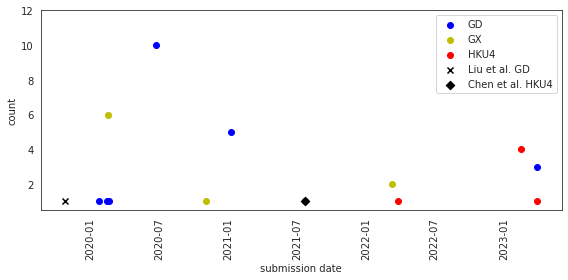

In [24]:



plt.rcParams["figure.figsize"] = (8,4)
plt.scatter(df_m_gd['Sequence Submission Date'],df_m_gd['counts'],color='b')
plt.scatter(df_m_gx['Sequence Submission Date'],df_m_gx['counts'],color='y')
plt.scatter(df_m_hk['Sequence Submission Date'],df_m_hk['counts'],color='r')
plt.scatter(df_m_liu['Sequence Submission Date'],df_m_liu['counts'],color='k', marker="x")
plt.scatter(df_m_chen['Sequence Submission Date'],df_m_chen['counts'],color='k', marker="D")
#plt.scatter(df_m_zc45['Sequence Submission Date'],df_m_zc45['counts'],color='k', marker="O")
plt.ylim(0.5, 12)
plt.xticks(rotation=90)
plt.ylabel('count')
plt.xlabel('submission date')
plt.legend(['GD', 'GX', 'HKU4','Liu et al. GD', 'Chen et al. HKU4'])
plt.tight_layout()
#plt.savefig(PLOT_PATH+'pcov_time_series.png', dpi=300)

In [25]:
sns.axes_style("whitegrid")
sns.set(rc={"figure.figsize":(10, 6)})


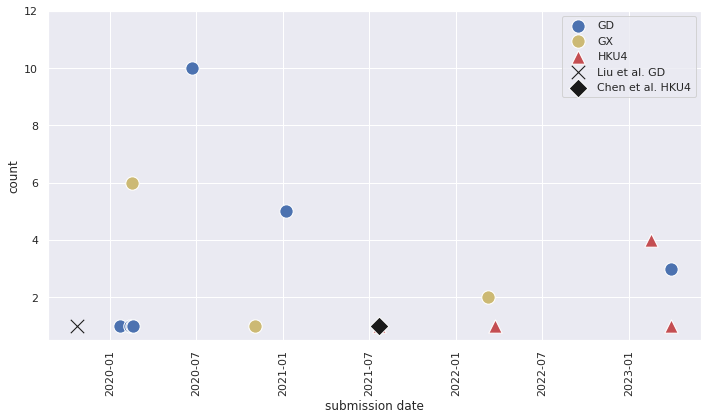

In [26]:

scatter=sns.scatterplot(data=df_m_gd, x='Sequence Submission Date', y='counts', s=180, color='b')
scatter=sns.scatterplot(data=df_m_gx, x='Sequence Submission Date', y='counts', s=180, color='y')
scatter=sns.scatterplot(data=df_m_hk, x='Sequence Submission Date', y='counts', s=180, color='r', marker="^")
scatter=sns.scatterplot(data=df_m_liu, x='Sequence Submission Date', y='counts', s=180, color='k', marker="x")
scatter=sns.scatterplot(data=df_m_chen, x='Sequence Submission Date', y='counts', s=180, color='k', marker="D")



plt.ylim(0.5, 12)
plt.xticks(rotation=90)
plt.ylabel('count')
plt.xlabel('submission date')
plt.legend(['GD', 'GX', 'HKU4','Liu et al. GD', 'Chen et al. HKU4'])
plt.tight_layout()
#plt.savefig(PLOT_PATH+'pcov_time_series_sns.png', dpi=300)